<a href="https://colab.research.google.com/github/vladijarosz/Cuenta-inv/blob/main/retornos_mensuales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
!pip install pyxirr
from pyxirr import xirr, xnpv
from scipy.stats import gmean

In [ ]:
!wget -O depositos.xlsx "https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/depositos.xlsx"

import pandas as pd
movimientos_1 = pd.read_excel("depositos.xlsx", sheet_name="movimientos")
movimientos_1['fecha'] = pd.to_datetime(movimientos_1['fecha'])
movimientos_1['anio_mes'] = movimientos_1['fecha'].dt.to_period('M')



--2026-02-06 19:50:47--  https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/depositos.xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/vladijarosz/Cuenta-inv/raw/refs/heads/main/datos/depositos.xlsx [following]
--2026-02-06 19:50:47--  https://github.com/vladijarosz/Cuenta-inv/raw/refs/heads/main/datos/depositos.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vladijarosz/Cuenta-inv/refs/heads/main/datos/depositos.xlsx [following]
--2026-02-06 19:50:47--  https://raw.githubusercontent.com/vladijarosz/Cuenta-inv/refs/heads/main/datos/depositos.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent

In [ ]:
# Calcular XIRR (tasa efectiva anual)
tasa = xirr(movimientos_1['fecha'], movimientos_1['importe usd'])
print(f"TIR efectiva (XIRR): {tasa:.2%}")

# Calcular XNPV (VAN descontado con la TIR encontrada)
valor_actual = xnpv(0.1, movimientos_1['fecha'], movimientos_1['importe usd'])
print(f"VAN descontado con XIRR: {valor_actual:.2f}")

TIR efectiva (XIRR): 93.18%
VAN descontado con XIRR: 74972.33


In [ ]:
!wget -O depositos.xlsx "https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/depositos.xlsx"

import pandas as pd
movimientos_2 = pd.read_excel("depositos.xlsx", sheet_name="tir")

# Cargar datos
mov = movimientos_2.copy()

# Asegurar datetime
mov['fecha'] = pd.to_datetime(mov['fecha'])

# Ordenar
mov = mov.sort_values('fecha')
mov['mes'] = mov['fecha'].dt.to_period('M')

def tir_mensual(df_mes):
    flujos = df_mes['importe usd']

    # Condición mínima para que exista TIR
    if not ((flujos < 0).any() and (flujos > 0).any()):
        return np.nan

    return xirr(df_mes['fecha'], flujos)

tir_por_mes = (
    mov
    .groupby('mes')
    .apply(tir_mensual)
    .reset_index(name='tir_nonper')
)

tir_por_mes['tir_nonper'] = (1 + tir_por_mes['tir_nonper'])**(1/12) - 1

tir_por_mes

--2026-02-06 19:50:47--  https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/depositos.xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/vladijarosz/Cuenta-inv/raw/refs/heads/main/datos/depositos.xlsx [following]
--2026-02-06 19:50:47--  https://github.com/vladijarosz/Cuenta-inv/raw/refs/heads/main/datos/depositos.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vladijarosz/Cuenta-inv/refs/heads/main/datos/depositos.xlsx [following]
--2026-02-06 19:50:47--  https://raw.githubusercontent.com/vladijarosz/Cuenta-inv/refs/heads/main/datos/depositos.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent

/tmp/ipython-input-3154658577.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(tir_mensual)


,mes,tir_nonper
0,2024-01,0.126304
1,2024-02,0.124931
2,2024-03,0.057961
3,2024-04,0.043535
4,2024-05,-0.001518
5,2024-06,-0.026538
6,2024-07,0.012801
7,2024-08,0.217379
8,2024-09,0.065444
9,2024-10,0.116242


In [ ]:
!wget -O MEP.csv "https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/MEP.csv"

import pandas as pd
df_mep = pd.read_csv("MEP.csv")
df_mep['fecha'] = pd.to_datetime(df_mep['fecha'])
df_mep['mep'] = pd.to_numeric(df_mep['ultimo'], errors='coerce')
df_mep.sort_values('fecha', inplace=True)

--2026-02-06 19:50:48--  https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/MEP.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/vladijarosz/Cuenta-inv/raw/refs/heads/main/datos/MEP.csv [following]
--2026-02-06 19:50:48--  https://github.com/vladijarosz/Cuenta-inv/raw/refs/heads/main/datos/MEP.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vladijarosz/Cuenta-inv/refs/heads/main/datos/MEP.csv [following]
--2026-02-06 19:50:48--  https://raw.githubusercontent.com/vladijarosz/Cuenta-inv/refs/heads/main/datos/MEP.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

In [ ]:
import yfinance as yf
import pandas as pd

# Lista de tickers
tickers = [
    "AAPL.BA", "AGRO.BA",  "ALUA.BA", "BBAR.BA", "BHIP.BA",
    "BMA.BA", "BPAT.BA", "BRKB.BA",  "CRES.BA", "EDN.BA",
    "GGAL.BA", "GOOGL.BA", "HARG.BA", "MELI.BA", "MOLA.BA",
     "MOLI.BA",  "PAMP.BA", "QQQ.BA", "SEMI.BA", "SPY.BA",
    "TGNO4.BA", "TSLA.BA", "TXAR.BA",  "XLE.BA",  "YPFD.BA", "^MERV",
]

# Descargar todos los tickers
data = {}
for ticker in tickers:
    df = yf.download(ticker, start="2023-12-01", end="2025-01-01", progress=False)['Close']
    df.name = ticker
    data[ticker] = df

# 🔥 CORRECCIÓN DEL RATIO DE MELI (antes del merge con MEP)

meli = data["MELI.BA"].copy()                 # tomar serie MELI
meli.index = pd.to_datetime(meli.index)       # asegurar datetime
mask = meli.index < pd.Timestamp("2024-01-24")
meli.loc[mask] = meli.loc[mask] / 2           # dividir precios previos al ratio
data["MELI.BA"] = meli                        # reemplazar la serie corregida

# Combinar en un único DataFrame por fecha
df_tickers = pd.concat(data.values(), axis=1)
df_tickers.index.name = 'fecha'
df_tickers = df_tickers.reset_index()

fecha_cambio = pd.Timestamp("2024-01-24")

df_tickers.loc[
    df_tickers['fecha'] < fecha_cambio,
    'AAPL.BA'
] = df_tickers.loc[
    df_tickers['fecha'] < fecha_cambio,
    'AAPL.BA'
] / 2


# Asegurar que df_mep tiene la fecha en datetime y columna 'ultimo'
df_mep['fecha'] = pd.to_datetime(df_mep['fecha'])
df_mep = df_mep[['fecha', 'ultimo']].dropna()

# Merge con df_mep (left join con precios)
df_merged = pd.merge(df_tickers, df_mep, on='fecha', how='left')

# Dividir cada precio por el MEP (último)
df_usd = df_merged.copy()
for ticker in tickers:
    df_usd[ticker] = df_usd[ticker] / df_usd['ultimo']

# Resultado en USD
df_usd = df_usd[['fecha'] + tickers]
df_usd


/tmp/ipython-input-3120776129.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2023-12-01", end="2025-01-01", progress=False)['Close']
/tmp/ipython-input-3120776129.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2023-12-01", end="2025-01-01", progress=False)['Close']
/tmp/ipython-input-3120776129.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2023-12-01", end="2025-01-01", progress=False)['Close']
/tmp/ipython-input-3120776129.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2023-12-01", end="2025-01-01", progress=False)['Close']
/tmp/ipython-input-3120776129.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2023-12-01", end="2025-01-01", 

,fecha,AAPL.BA,AGRO.BA,ALUA.BA,BBAR.BA,BHIP.BA,BMA.BA,BPAT.BA,BRKB.BA,CRES.BA,...,PAMP.BA,QQQ.BA,SEMI.BA,SPY.BA,TGNO4.BA,TSLA.BA,TXAR.BA,XLE.BA,YPFD.BA,^MERV
0,2023-12-01,9.544762,0.042911,1.150387,1.522709,0.067834,2.482237,0.419510,15.950380,0.798852,...,1.915301,19.317342,0.012444,22.732676,1.082829,15.812667,1.012460,41.443936,16.852560,958.663200
1,2023-12-04,9.109506,0.042714,1.117493,1.483713,0.064429,2.321317,0.400326,15.628936,0.779176,...,1.854499,18.570183,0.014504,21.903326,1.105421,15.219320,1.007612,40.083396,16.061059,925.890148
2,2023-12-05,9.349888,0.042206,1.049040,1.525570,0.063826,2.336212,0.406422,15.637470,0.809318,...,1.933059,18.675138,0.015505,22.106965,1.205101,15.498390,0.943608,39.857666,17.277284,947.106589
3,2023-12-06,9.622844,0.042639,1.087419,1.517125,0.064652,2.285572,0.421754,15.996392,0.789425,...,1.921381,19.261271,0.016386,22.736465,1.279936,16.140480,1.004878,40.158379,16.863906,954.715934
4,2023-12-07,9.801016,0.044304,1.106010,1.460103,0.064364,2.281763,0.442497,16.127315,0.818751,...,1.927370,19.529315,0.016437,22.926072,1.226088,16.135426,1.017874,39.975087,16.716952,954.844531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,2024-12-23,12.797855,0.066334,0.779598,6.043369,0.416486,9.455251,2.209750,20.777768,1.185734,...,3.497376,26.329200,0.022544,29.901613,3.097388,29.080272,0.788953,41.735853,42.867590,2151.899682
261,2024-12-24,13.006319,0.066496,0.789059,6.379387,0.419271,9.630710,2.220341,21.103043,1.195223,...,3.561677,26.746369,0.023016,30.301201,3.126994,31.051621,0.793302,42.401266,43.411974,2197.317760
262,2024-12-26,13.130991,0.066018,0.776427,6.509411,0.450044,9.875582,2.265458,21.137767,1.249592,...,3.599826,26.839541,0.025655,30.491956,3.118957,30.767194,0.762668,42.232074,43.513908,2218.303171
263,2024-12-27,12.899763,0.064157,0.767299,6.536354,0.450934,9.776316,2.238120,21.036940,1.245912,...,3.579483,26.356652,0.025131,30.010326,3.045994,29.067284,0.765446,42.328472,43.099030,2201.976832


In [ ]:
# Usar 'fecha' como índice
df_usd['fecha'] = pd.to_datetime(df_usd['fecha'])
df_usd.set_index('fecha', inplace=True)

# Asegurar orden por fecha
df_usd = df_usd.sort_index()

# Tomar el último valor de cada mes
df_mensual = df_usd.resample('ME').last()

# Calcular variaciones porcentuales mensuales
variaciones_mensuales_usd = df_mensual.pct_change().dropna()

# Mostrar resultados
variaciones_mensuales_usd


,AAPL.BA,AGRO.BA,ALUA.BA,BBAR.BA,BHIP.BA,BMA.BA,BPAT.BA,BRKB.BA,CRES.BA,EDN.BA,...,PAMP.BA,QQQ.BA,SEMI.BA,SPY.BA,TGNO4.BA,TSLA.BA,TXAR.BA,XLE.BA,YPFD.BA,^MERV
fecha,,,,,,,,,,,,,,,,,,,,,
2024-01-31,0.043017,0.000788,-0.051159,0.238990,0.652176,0.355342,0.303875,0.165071,0.068731,0.115228,...,0.073812,0.108388,0.064319,0.109172,0.114908,-0.171631,0.018283,0.082805,0.105533,0.147513
2024-02-29,-0.048632,-0.167761,-0.143028,-0.021885,0.038753,0.129468,-0.085407,0.043680,-0.191572,-0.167281,...,-0.177807,0.021599,-0.071155,0.022039,-0.240620,0.024366,-0.157634,0.007698,-0.043332,-0.083182
2024-03-31,-0.011413,0.085185,0.161770,0.396758,0.426469,0.334804,0.306636,0.047596,0.142935,0.094083,...,0.083737,0.044771,0.066186,0.058642,0.357304,-0.077687,0.203475,0.116180,0.211883,0.214899
2024-04-30,-0.027982,-0.058007,-0.072195,0.116191,0.385319,0.040223,0.572358,-0.063624,0.096612,-0.058982,...,0.007078,-0.061700,-0.148150,-0.053609,0.104364,0.002539,-0.081087,-0.010947,0.075631,0.064744
2024-05-31,0.096950,0.092667,0.025935,0.216537,-0.071240,0.243044,0.555405,0.020445,0.008668,0.010545,...,0.085366,0.037719,0.149876,0.021557,0.104815,-0.052145,0.036906,-0.030009,0.031438,0.068073
2024-06-30,0.078444,-0.084372,-0.119797,-0.154673,-0.080938,-0.143551,-0.143635,-0.038612,-0.138571,-0.106869,...,-0.119853,0.043066,0.216046,0.014094,-0.115020,0.086156,-0.139051,-0.042140,-0.152732,-0.119864
2024-07-31,0.039985,-0.014422,0.010561,-0.022813,-0.080950,-0.069704,0.052907,0.066206,-0.063605,0.007932,...,0.014656,-0.031078,-0.094651,-0.000033,-0.039387,0.162431,0.010138,0.015446,-0.013761,-0.041488
2024-08-31,0.047543,-0.003637,-0.041291,0.205396,0.094990,0.175763,-0.048187,0.105082,0.040608,0.195457,...,0.215120,0.031323,-0.101936,0.042557,0.089980,-0.062001,-0.107297,-0.005540,0.200578,0.171172
2024-09-30,0.019686,0.040411,0.002391,0.024643,0.008835,0.093583,-0.067696,-0.025498,0.094152,0.145406,...,0.109473,0.030352,0.067730,0.026761,0.180857,0.229012,0.049650,-0.028626,-0.091893,0.041072


In [ ]:
df_usd=df_usd.loc['2024-01-01':'2025-01-01']


In [ ]:
import pandas as pd

# =========================================================
# 1. Variaciones mensuales SPY y MERV (MES)
# =========================================================

merv_spy_var = variaciones_mensuales_usd[['SPY.BA', '^MERV']].copy()

# asegurar datetime
merv_spy_var.index = pd.to_datetime(merv_spy_var.index)

# llevar a frecuencia mensual (inicio de mes) y luego a Period[M]
merv_spy_var = merv_spy_var.resample('MS').first()
merv_spy_var.index = merv_spy_var.index.to_period('M')


# =========================================================
# 2. TIR mensual (MES)
# =========================================================

tir = tir_por_mes.copy()

# asegurar Period[M]
tir['mes'] = tir['mes'].astype('period[M]')
tir = tir.set_index('mes')


# =========================================================
# 3. Merge por mes (alineación perfecta)
# =========================================================

var = merv_spy_var.merge(
    tir[['tir_nonper']],
    left_index=True,
    right_index=True,
    how='left'
)

# renombrar
var = var.rename(columns={'tir_nonper': 'ganancia'})


# =========================================================
# 4. Resultado final
# =========================================================

var['active_return'] = var['ganancia']- var['SPY.BA']
var['indice_ganancia']= 10000*(1+var['ganancia']).cumprod()
var['indice_syp']= 10000*(1+var['SPY.BA']).cumprod()
gross_HPR_ganan=1+var['ganancia']
gross_HPR_spy=1+var['SPY.BA']
var

,SPY.BA,^MERV,ganancia,active_return,indice_ganancia,indice_syp
fecha,,,,,,
2024-01,0.109172,0.147513,0.126304,0.017131,11263.037135,11091.723226
2024-02,0.022039,-0.083182,0.124931,0.102892,12670.134083,11336.169876
2024-03,0.058642,0.214899,0.057961,-0.000682,13404.502544,12000.947265
2024-04,-0.053609,0.064744,0.043535,0.097143,13988.062966,11357.593389
2024-05,0.021557,0.068073,-0.001518,-0.023076,13966.823716,11602.431522
2024-06,0.014094,-0.119864,-0.026538,-0.040632,13596.170515,11765.954305
2024-07,-0.000033,-0.041488,0.012801,0.012834,13770.213361,11765.568645
2024-08,0.042557,0.171172,0.217379,0.174822,16763.575095,12266.278233
2024-09,0.026761,0.041072,0.065444,0.038684,17860.655769,12594.531943


In [ ]:
posi_bench=var['SPY.BA']>0
posi_bench.sum()

np.int64(8)

In [ ]:
var['SPY.BA'].max()

0.10917232255378906

In [ ]:
posi=var['ganancia']>0
posi.sum()

np.int64(10)

In [ ]:
out_bench= var['active_return']>0
out_bench.sum()

np.int64(9)

In [ ]:
sharpe_ganan=(var['active_return'].mean()-0.003675)/var['ganancia'].std()
sharpe_ganan

np.float64(0.6623520403894985)

In [ ]:
sharpe_bench=(var['SPY.BA'].mean()-0.003675)/var['SPY.BA'].std()
sharpe_bench

np.float64(0.4098188260402862)

In [ ]:

geo_return = gmean(gross_HPR_ganan) - 1
geo_return

np.float64(0.07600831734611524)

In [ ]:
geo_return = gmean(gross_HPR_spy) - 1
geo_return

np.float64(0.021382616556367973)

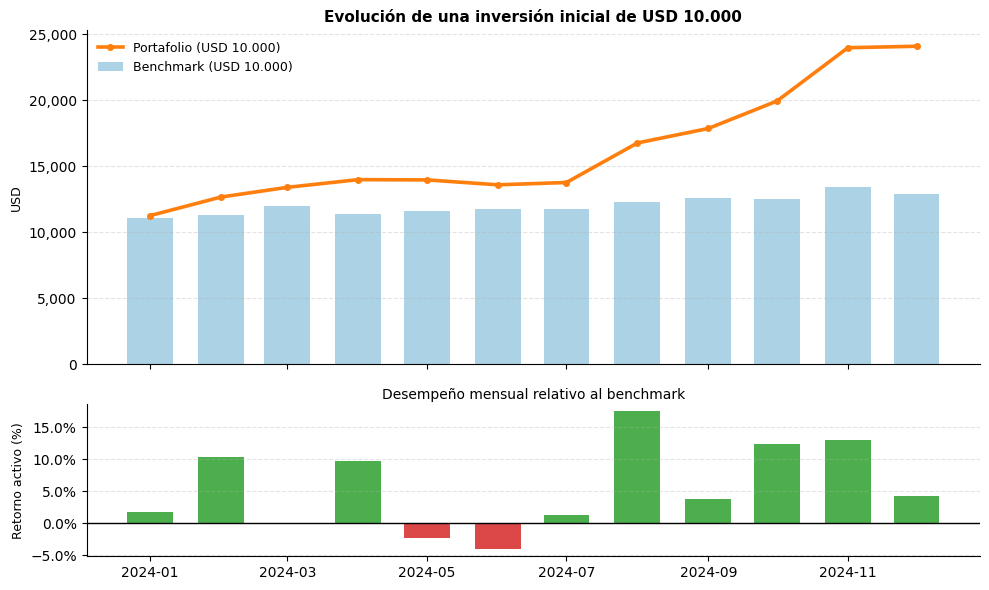

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np

# Si el índice es Period[M], convertir a timestamp
if isinstance(var.index, pd.PeriodIndex):
    x = var.index.to_timestamp()
else:
    x = var.index

# -----------------------------
# Colores
# -----------------------------
color_ganancia  = "#ff7f0e"   # naranja (portfolio)
color_benchmark = "#9ecae1"   # azul claro (benchmark)
color_positive  = "#2ca02c"   # verde
color_negative  = "#d62728"   # rojo

# -----------------------------
# Gráfico tipo factsheet
# -----------------------------
fig, (ax1, ax2) = plt.subplots(
    2, 1,
    figsize=(10, 6),
    sharex=True,
    gridspec_kw={"height_ratios": [2.2, 1]}
)

# =============================
# Panel superior: Evolución del capital
# =============================
ax1.bar(
    x,
    var["indice_syp"],
    width=20,
    color=color_benchmark,
    alpha=0.85,
    label="Benchmark (USD 10.000)"
)

ax1.plot(
    x,
    var["indice_ganancia"],
    color=color_ganancia,
    linewidth=2.6,
    marker="o",
    markersize=4,
    label="Portafolio (USD 10.000)"
)

ax1.set_title(
    "Evolución de una inversión inicial de USD 10.000",
    fontsize=11,
    weight="bold",
    pad=6
)

ax1.set_ylabel("USD", fontsize=9)

ax1.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda y, _: f"{int(y):,}")
)

ax1.grid(axis="y", linestyle="--", alpha=0.35)
ax1.grid(axis="x", visible=False)

ax1.legend(
    frameon=False,
    fontsize=9,
    loc="upper left"
)

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

# =============================
# Panel inferior: Retorno activo
# =============================
colors_active = np.where(
    var["active_return"] >= 0,
    color_positive,
    color_negative
)

ax2.bar(
    x,
    var["active_return"] * 100,
    width=20,
    color=colors_active,
    alpha=0.85
)

ax2.axhline(0, color="black", linewidth=1)

ax2.set_title(
    "Desempeño mensual relativo al benchmark",
    fontsize=10,
    pad=4
)

ax2.set_ylabel("Retorno activo (%)", fontsize=9)

ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.grid(axis="y", linestyle="--", alpha=0.35)
ax2.grid(axis="x", visible=False)

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

# =============================
# Ajustes finales
# =============================
plt.tight_layout()
plt.show()


In [ ]:
var['active_return'].mean()

np.float64(0.05633966671379113)

In [ ]:
var['active_return'].std()

0.06790394906272883

In [ ]:
var['ganancia'].mean()

np.float64(0.07864710843357278)

In [ ]:
var['ganancia'].std()


0.07951159429179305

In [ ]:
var['SPY.BA'].mean()

np.float64(0.02230744171978165)

In [ ]:
var['SPY.BA'].std()


0.04546507025997394

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Retornos mensuales
ret_port = var['ganancia']
ret_bench = var['SPY.BA']

metrics = pd.DataFrame({
    'Activo': ['Portafolio', 'Benchmark'],
    'Rendimiento': [
        ret_port.mean(),
        ret_bench.mean()
    ],
    'Volatilidad': [
        ret_port.std(),
        ret_bench.std()
    ]
})
metrics

,Activo,Rendimiento,Volatilidad
0,Portafolio,0.078647,0.079512
1,Benchmark,0.022307,0.045465


/tmp/ipython-input-2686960768.py:90: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, fontsize=9, loc='upper left')


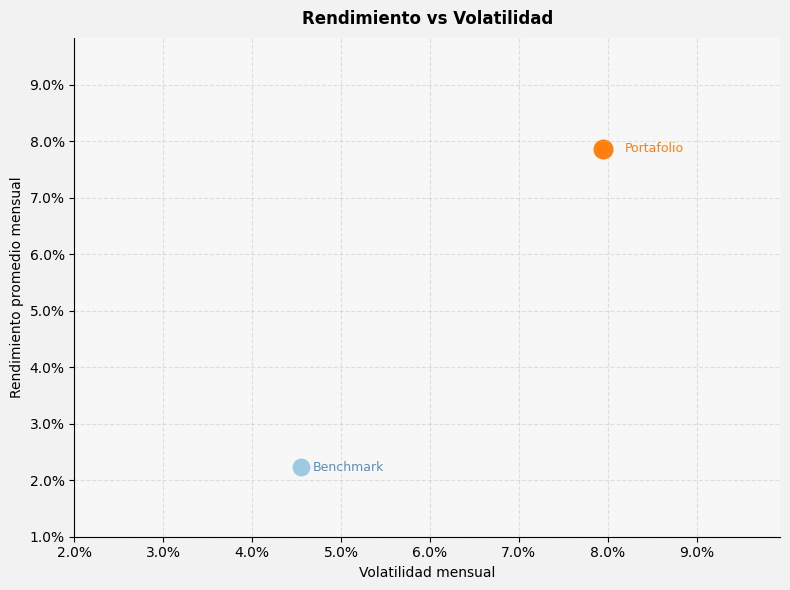

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# =======================
# Figura
# =======================
fig, ax = plt.subplots(figsize=(8, 6))

# Fondo profesional
fig.patch.set_facecolor('#f2f2f2')
ax.set_facecolor('#f7f7f7')

# =======================
# Extraer valores
# =======================
vol_port = metrics.loc[metrics['Activo'] == 'Portafolio', 'Volatilidad'].iloc[0]
ret_port = metrics.loc[metrics['Activo'] == 'Portafolio', 'Rendimiento'].iloc[0]

vol_bench = metrics.loc[metrics['Activo'] == 'Benchmark', 'Volatilidad'].iloc[0]
ret_bench = metrics.loc[metrics['Activo'] == 'Benchmark', 'Rendimiento'].iloc[0]

# =======================
# Scatter (SIN duplicación)
# =======================

# Benchmark
ax.scatter(
    vol_bench,
    ret_bench,
    s=140,
    marker='o',
    facecolor='#9ecae1')

# Portafolio
ax.scatter(
    vol_port,
    ret_port,
    s=180,
    marker='o',
    facecolor='#ff7f0e'
)

# =======================
# Etiquetas directas
# =======================
ax.text(
    vol_port * 1.03,
    ret_port,
    'Portafolio',
    fontsize=9,
    va='center',
    color='#ff7f0e'
)

ax.text(
    vol_bench * 1.03,
    ret_bench,
    'Benchmark',
    fontsize=9,
    va='center',
    color='#5b8db8'
)

# =======================
# Escala ampliada
# =======================
x_min = min(vol_port, vol_bench) * 0.8
x_max = max(vol_port, vol_bench) * 1.25
y_min = min(ret_port, ret_bench) * 0.8
y_max = max(ret_port, ret_bench) * 1.25

ax.set_xlim(0.02, x_max)
ax.set_ylim(0.01, y_max)

# =======================
# Estilo general
# =======================
ax.set_title('Rendimiento vs Volatilidad', fontsize=12, weight='bold', pad=10)
ax.set_xlabel('Volatilidad mensual', fontsize=10)
ax.set_ylabel('Rendimiento promedio mensual', fontsize=10)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

ax.grid(axis='both', linestyle='--', linewidth=0.8, alpha=0.35)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(frameon=False, fontsize=9, loc='upper left')

plt.tight_layout()
plt.show()